### Import packages

In [7]:

from dataprocess import *
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

### type = 0, is disease or no (TASK A); type 1 is different diseases (TASK B)

In [3]:
type = 1
data = main(type=type)
df = process_data(data)
df.head()


,subject_id,HP:0000093,HP:0000829,HP:0000843,HP:0000870,HP:0001873,HP:0001880,HP:0001882,HP:0001888,HP:0001894,...,HP:0040303,HP:0045042,HP:0045057,HP:0100493,HP:0100827,HP:0410173,HP:0410174,HP:0410288,HP:0410289,disease
0,10006,0,0,0,0,1,0,1,1,1,...,1,0,0,0,1,0,1,0,0,D
1,10019,0,0,0,0,1,0,1,0,1,...,0,0,0,1,0,0,0,0,0,J
2,10019,0,0,0,0,1,0,1,0,1,...,0,0,0,1,0,0,0,0,0,J
3,10029,0,0,0,0,1,0,1,1,1,...,0,0,0,0,1,0,1,1,1,J
4,10032,0,0,0,0,1,1,1,1,1,...,0,0,0,0,1,0,1,0,0,I


In [7]:

X = df.drop(['subject_id', 'disease'], axis=1)

y = df['disease']
if type==1:
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(y)




array([ 2,  8,  8,  8,  7,  7,  7, 13,  9, 11,  7,  7,  7,  8,  9,  2,  8,
        8,  7,  8,  9, 11,  8,  8,  3,  9,  9,  2,  8,  7,  7,  7,  8,  2,
        7,  7,  7,  7,  4,  4,  1,  2, 11,  8,  8,  8,  8,  9,  1,  8,  8,
        7, 11,  9,  7,  2,  5,  9,  8,  7,  7,  7,  7, 12,  7,  2,  2,  2,
        8,  6,  9,  0,  7,  7,  8,  9,  8,  7,  7,  2,  7,  7,  7,  9,  8,
        7,  7,  8,  7, 10,  9, 10,  9,  2,  8,  9,  1,  2,  8,  8,  7,  8,
        9, 12,  7,  7,  9,  9,  7, 11, 13,  9,  8,  7,  9,  7,  7,  7,  7,
        7,  8,  7,  7,  7,  7,  7,  7,  9,  8,  9,  7,  7,  8,  8,  9,  9,
        8,  7,  2,  8])

In [9]:
classifier = RandomForestClassifier(n_estimators=3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=3, random_state=42)

In [11]:

# Predict the test set
y_pred = classifier.predict(X_test)
results_df = pd.DataFrame({
    'subject_id': X_test.index,  
    'disease': y_pred
})
if type==0:
    results_df.to_csv('taskA_predictions.csv')
else:
    results_df.to_csv('taskB_predictions.csv')
# print(classification_report(y_test, y_pred))
# print(f"Accuracy: {accuracy_score(y_test, y_pred)}")


              precision    recall  f1-score   support

           C       0.00      0.00      0.00         1
           D       0.00      0.00      0.00         4
           E       0.00      0.00      0.00         0
           G       0.00      0.00      0.00         1
           H       0.00      0.00      0.00         1
           I       0.82      0.64      0.72        14
           J       0.09      0.50      0.15         2
           K       0.00      0.00      0.00         2
           M       0.00      0.00      0.00         2
           R       0.00      0.00      0.00         1

    accuracy                           0.36        28
   macro avg       0.09      0.11      0.09        28
weighted avg       0.42      0.36      0.37        28

Accuracy: 0.35714285714285715


/Users/Sandhanakrishnan/anaconda3/envs/deepl/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/Sandhanakrishnan/anaconda3/envs/deepl/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/Sandhanakrishnan/anaconda3/envs/deepl/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifie

In [8]:

val_path = '/Users/Sandhanakrishnan/Documents/disease_split_val_sim_patients_8.9.21_kg.txt'

In [10]:
import json
tdata = []
with open(train_path, 'r') as file:
    for line in file:
        # Parse the JSON data from each line
        json_data = json.loads(line)
        tdata.append(json_data)
vdata = []
with open(train_path, 'r') as file:
    for line in file:
        # Parse the JSON data from each line
        json_data = json.loads(line)
        vdata.append(json_data)

In [11]:
# train_df = pd.DataFrame(tdata)
val_df = pd.DataFrame(vdata)
val_df = val_df[(val_df['age'] == 'Onset_Infant') | (val_df['age'] == 'Onset_Child')]
df = val_df[['true_genes','positive_phenotypes','true_diseases']]
df= df.explode('true_diseases')
# df = df.explode('true_genes')
df

,true_genes,positive_phenotypes,true_diseases
0,[ENSG00000146085],"[HP:0000124, HP:0001249, HP:0001254, HP:000125...",289916
2,[ENSG00000136944],"[HP:0000083, HP:0000093, HP:0000822, HP:000432...",2613
6,[ENSG00000102100],"[HP:0001249, HP:0001263, HP:0002521, HP:000894...",356961
7,[ENSG00000115648],"[HP:0007730, HP:0002487, HP:0000752, HP:000070...",79478
10,[ENSG00000111199],"[HP:0000926, HP:0002812, HP:0003015, HP:000432...",93314
...,...,...,...
36215,[ENSG00000102103],"[HP:0001249, HP:0003202, HP:0004326, HP:000004...",93945
36219,[ENSG00000169562],"[HP:0002073, HP:0001270, HP:0001347, HP:000207...",1175
36220,[ENSG00000138823],"[HP:0000505, HP:0001315, HP:0100022, HP:000248...",14
36221,[ENSG00000157911],"[HP:0002073, HP:0001256, HP:0007772, HP:000347...",247815


In [12]:
mlb_genes = MultiLabelBinarizer()
genes_encoded = mlb_genes.fit_transform(df['true_genes'])

mlb_phenotypes = MultiLabelBinarizer()
phenotypes_encoded = mlb_phenotypes.fit_transform(df['positive_phenotypes'])

# Create feature DataFrame from encoded data
features = pd.DataFrame(genes_encoded, columns=mlb_genes.classes_)
phenotypes_df = pd.DataFrame(phenotypes_encoded, columns=mlb_phenotypes.classes_)
features = pd.concat([features, phenotypes_df], axis=1)
labels = df['true_diseases']


In [13]:
labels

0        289916
2          2613
6        356961
7         79478
10        93314
          ...  
36215     93945
36219      1175
36220        14
36221    247815
36222     66634
Name: true_diseases, Length: 24211, dtype: object

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
features_subset = features.iloc[:9000]  
labels_subset = labels.iloc[:9000]

# Now use train_test_split on this subset
X_train, X_test, y_train, y_test = train_test_split(features_subset, labels_subset, test_size=0.2, random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
accuracy = rf.score(X_test, y_test)
print(f"Test Accuracy: {accuracy}")


Test Accuracy: 0.8722222222222222


In [35]:
from sklearn.metrics import accuracy_score, f1_score
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")
f1 = f1_score(y_test, y_pred, average='macro')
print(f"Test F1 Score: {f1:.4f}")

Test Accuracy: 0.8722
Test F1 Score: 0.7919


In [39]:
y_pred

array(['90695', '3208', '524', ..., '85277', '869', '35069'], dtype=object)

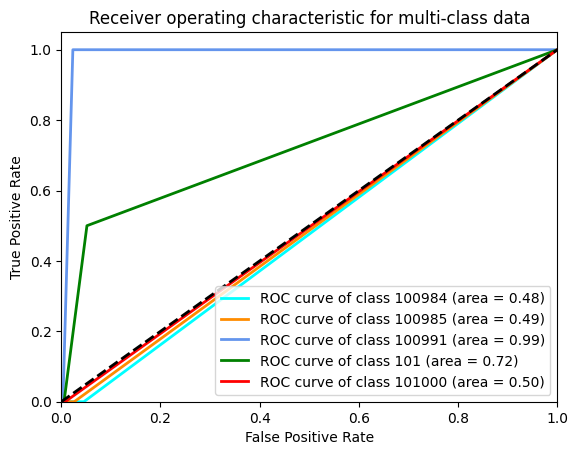

In [36]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt

# Assuming y_test are your actual labels and not already binarized
# Classes should be an array of distinct label values.
classes = np.unique(y_test)
y_test_binarized = label_binarize(y_test, classes=classes)
y_prob = rf.predict_proba(X_test)
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting
plt.figure()
colors = ['aqua', 'darkorange', 'cornflowerblue', 'green', 'red']
for i, color in zip(range(len(classes)), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(classes[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()


In [34]:
import threading
from neo4j import GraphDatabase

class QueryTimeout(Exception):
    """Custom exception to signal a query timeout."""
    pass

class QueryRunner(threading.Thread):
    def __init__(self, uri, user, password, database, query):
        threading.Thread.__init__(self)
        self.uri = uri
        self.user = user
        self.password = password
        self.database = database
        self.query = query
        self.result = None  # To store the result of the query
        self.driver = GraphDatabase.driver(self.uri, auth=(self.user, self.password))

    def run(self):
        with self.driver.session(database=self.database) as session:
            # Execute the query and store results
            self.result = session.run(self.query).data()

    def close_driver(self):
        self.driver.close()

def run_query_with_timeout(uri, user, password, database, query, timeout_sec):
    query_runner = QueryRunner(uri, user, password, database, query)
    query_runner.start()
    query_runner.join(timeout=timeout_sec)  # Wait for the query to finish or timeout

    if query_runner.is_alive():
        # If the thread is still alive after the timeout, we assume the query is still running
        print("Query timed out, abandoning the thread...")
        query_runner.close_driver()  # Attempt to close the driver, but the thread remains running
        query_runner.join()  # Optional: ensure thread resources are cleaned up
        raise QueryTimeout("Query execution exceeded the timeout limit and was abandoned.")
    else:
        print("Query completed within the timeout.")
        query_runner.close_driver()  # Ensure to close the driver properly
        return query_runner.result  # Return the results if completed in time

# Usage
uri = "bolt://83.229.84.12:7687"  
username = "tumaiReadonly"
password = "MAKEATHON2024" 
database = "graph2.db"
query = "MATCH (n) RETURN n LIMIT 300"

try:
    data = run_query_with_timeout(uri, username, password, database, query, 1)  # Timeout set to 10 seconds
    print(data)
except QueryTimeout as e:
    print(e)


Query timed out, abandoning the thread...
Query execution exceeded the timeout limit and was abandoned.
